1. Write the skewness program, and use it to calculate the skewness coefficient of the four examination subjects in results.txt (results.csv). What can you say about these data? Pearson has given an approximate formula for the skewness that is easier to calculate than the exact formula given in Equation 2.1.

In [5]:
install.packages("readr")
library(readr)

set.seed(123)

data <- data.frame(
  ID = 1:50,
  Subject1 = sample(50:100, 50, replace = TRUE),
  Subject2 = sample(45:95, 50, replace = TRUE),
  Subject3 = sample(40:90, 50, replace = TRUE),
  Subject4 = sample(35:85, 50, replace = TRUE),
  Gender = sample(c("Male", "Female"), 50, replace = TRUE)
)

write.csv(data, "results.csv", row.names = FALSE)

data <- read.csv("results.csv")

print("First few rows of the dataset:")
print(head(data))

compute_skewness <- function(x) {
  mean_x <- mean(x, na.rm = TRUE)
  median_x <- median(x, na.rm = TRUE)
  sd_x <- sd(x, na.rm = TRUE)

  skew <- (3 * (mean_x - median_x)) / sd_x
  return(skew)
}

skewness_values <- sapply(data[, 2:5], compute_skewness)

print("Skewness values for each subject:")
print(skewness_values)

for (i in 1:length(skewness_values)) {
  if (skewness_values[i] > 0) {
    cat(names(skewness_values)[i], "is right-skewed (positive skewness)\n")
  } else if (skewness_values[i] < 0) {
    cat(names(skewness_values)[i], "is left-skewed (negative skewness)\n")
  } else {
    cat(names(skewness_values)[i], "is symmetric (zero skewness)\n")
  }
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "First few rows of the dataset:"
  ID Subject1 Subject2 Subject3 Subject4 Gender
1  1       80       52       71       78   Male
2  2       64       56       46       80 Female
3  3      100       57       42       53   Male
4  4       63       62       62       59   Male
5  5       52       77       54       73   Male
6  6       91       71       60       60 Female
[1] "Skewness values for each subject:"
   Subject1    Subject2    Subject3    Subject4 
-0.29293432 -0.04090521  0.41043817 -0.02348505 
Subject1 is left-skewed (negative skewness)
Subject2 is left-skewed (negative skewness)
Subject3 is right-skewed (positive skewness)
Subject4 is left-skewed (negative skewness)


2. For the class of 50 students of computing detailed in Exercise 1.1, use R to

(a)  form the stem-and-leaf display for each gender, and discuss the advantages of this representation compared to the traditional histogram;
(b)  construct a box-plot for each gender and discuss the findings.



[1] "Stem-and-leaf plot for Male students (Subject1):"

  The decimal point is at the |

   52 | 0
   54 | 00
   56 | 00
   58 | 00
   60 | 
   62 | 00
   64 | 0
   66 | 0
   68 | 0
   70 | 
   72 | 0
   74 | 000
   76 | 000
   78 | 0
   80 | 0
   82 | 
   84 | 0
   86 | 0
   88 | 0
   90 | 00
   92 | 0
   94 | 0
   96 | 
   98 | 
  100 | 00

[1] "Stem-and-leaf plot for Female students (Subject1):"

  The decimal point is 1 digit(s) to the right of the |

  5 | 6789
  6 | 134
  6 | 
  7 | 4
  7 | 678
  8 | 1134
  8 | 7
  9 | 012
  9 | 9



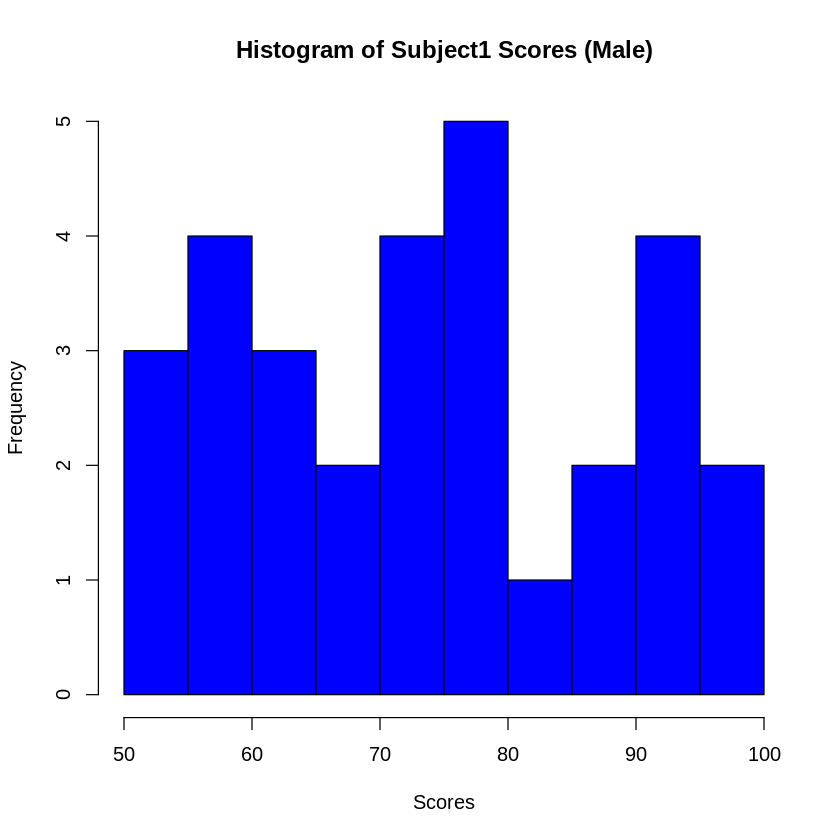

png 
  3

pdf 
  2

png 
  3

pdf 
  2

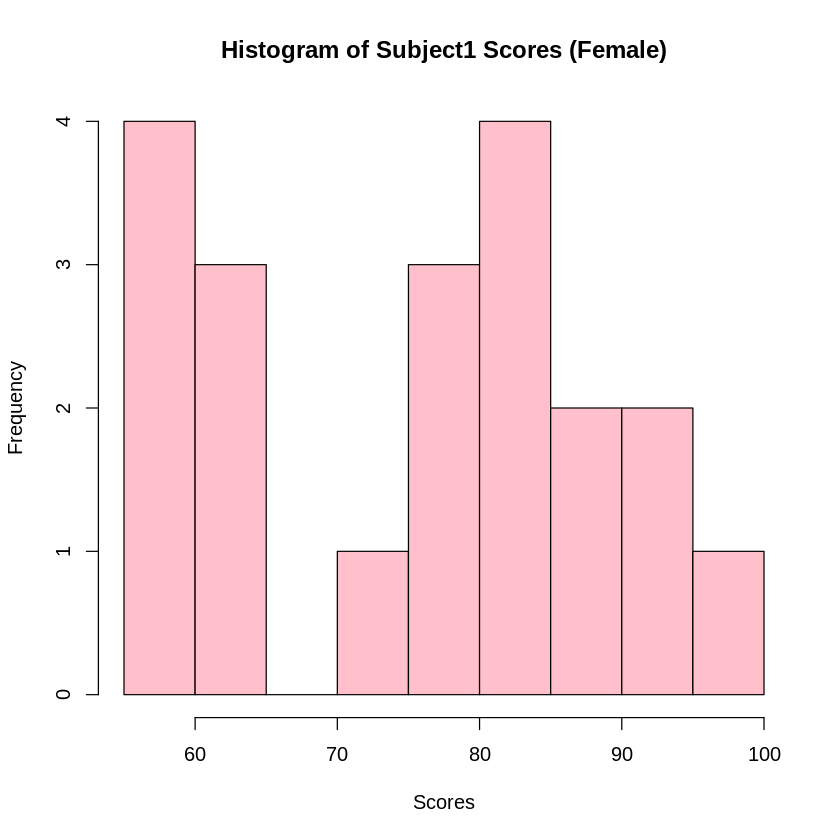

In [8]:
data <- read.csv("results.csv")

print("Stem-and-leaf plot for Male students (Subject1):")
stem(data$Subject1[data$Gender == "Male"], scale = 2)

print("Stem-and-leaf plot for Female students (Subject1):")
stem(data$Subject1[data$Gender == "Female"], scale = 2)

hist(data$Subject1[data$Gender == "Male"],
     main = "Histogram of Subject1 Scores (Male)",
     xlab = "Scores", col = "blue", border = "black", breaks = 10)

hist(data$Subject1[data$Gender == "Female"],
     main = "Histogram of Subject1 Scores (Female)",
     xlab = "Scores", col = "pink", border = "black", breaks = 10)

dev.copy(png, "histogram_male.png")
dev.off()

dev.copy(png, "histogram_female.png")
dev.off()